<h1>Feature extraction</h1>

<h3>Colour histogram</h3>
To quantify the colour of a skin lesion we use a Colour Histogram. Using the function cv2.calcHist we calculate the histogram for the picture, the histogram is a 3D array which counts the number of pixels for each combination of hue,saturation and value.

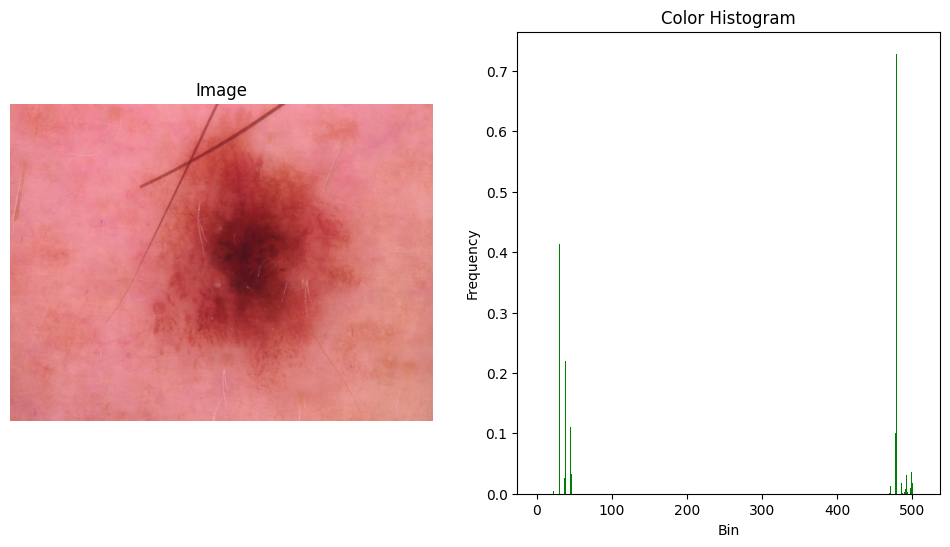

In [6]:
import cv2
import matplotlib.pyplot as plt

def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

image_path = 'examples/ISIC_0024306.jpg'
image = cv2.imread(image_path)

color_hist = extract_color_histogram(image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax1.set_title('Image')

ax2.bar(range(len(color_hist)), color_hist, color='green')
ax2.set_xlabel('Bin')
ax2.set_ylabel('Frequency')
ax2.set_title('Color Histogram')

plt.show()


<h3>Hu Moments</h3>
Hu Moments are derived from pixel intensity in an image, they are used to describe shape of an object in an image. They are invariant to image transformations such as translation, scaling and rotation. There are 7 Hu Moments, the first two are related to objects area and elongation and the rest capture more complex shape characteristics.

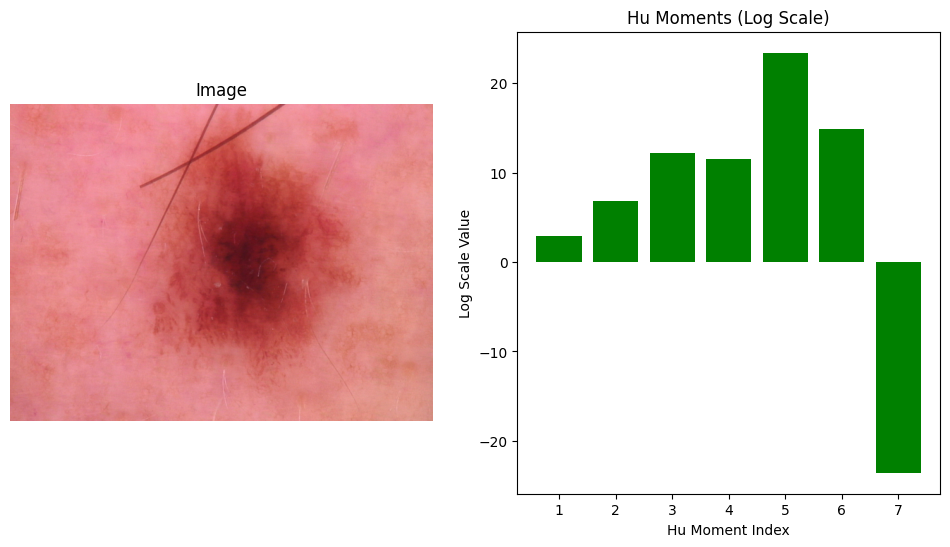

In [3]:

import cv2
import matplotlib.pyplot as plt 
import numpy as np

def extract_hu_moments(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray)
    hu_moments = cv2.HuMoments(moments)
    return hu_moments.flatten()

image_path = 'examples/ISIC_0024306.jpg'
image = cv2.imread(image_path)

hu_moments = extract_hu_moments(image)

hu_moments_log = -np.sign(hu_moments) * np.log10(np.abs(hu_moments))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax1.set_title('Image')

ax2.bar(range(1, 8), hu_moments_log, color='green')
ax2.set_xlabel('Hu Moment Index')
ax2.set_ylabel('Log Scale Value')
ax2.set_title('Hu Moments (Log Scale)')


plt.show()

<h3>Haralick Features</h3>

The Haralick Features are calculated using the Gray-Level Co-Occurrence Matrix (GLCM), which describes the frequency of pairs of pixel values occurring at a specified distance and angle in the image. In our case, the distance is one pixel, and the angles are 0°, 45°, 90°, and 135°.

The Haralick Features are:

- **Contrast**: Measures the local variations in the GLCM.
- **Dissimilarity**: Measures how different the elements of the GLCM are from each other.
- **Homogeneity**: Measures the closeness of the distribution of elements in the GLCM to the GLCM diagonal.
- **Energy**: Sum of squared elements in the GLCM. It is also known as uniformity or the angular second moment.
- **Correlation**: Measures how correlated a pixel is to its neighbor over the whole image.
- **ASM (Angular Second Moment)**: Also known as energy, it measures the uniformity of the GLCM.



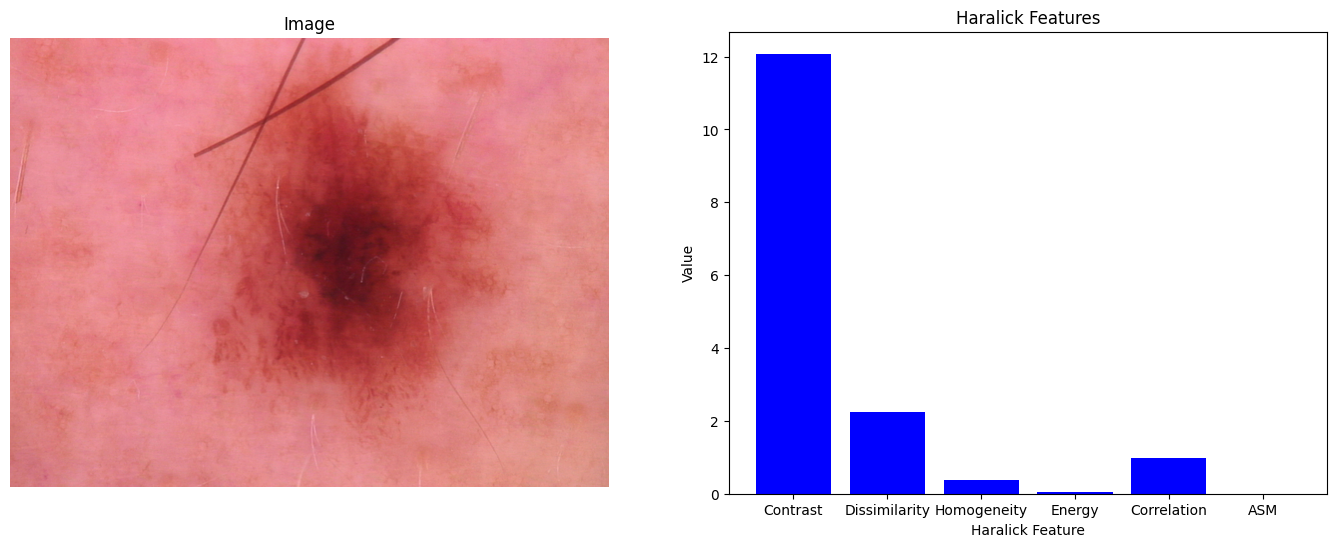

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

def extract_haralick_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
    haralick_features = []
    for prop in ('contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM'):
        haralick_features.append(graycoprops(glcm, prop).mean())
    return np.array(haralick_features)

image_path = 'examples/ISIC_0024306.jpg'
image = cv2.imread(image_path)

haralick_features = extract_haralick_features(image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax1.set_title('Image')

feature_names = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM']
ax2.bar(feature_names, haralick_features, color='blue')
ax2.set_xlabel('Haralick Feature')
ax2.set_ylabel('Value')
ax2.set_title('Haralick Features')

plt.show()
